# Components of K-Means Clustering

### Introduction

In this lesson, let's begin to understand the k-means clustering algorithm by unpacking the hypothesis function, cost function, and optimization procedure.  Along the way, we'll learn about centroids and how they play a role in each of these components. 

### Loading the Data

We can begin by loading our data from our Airbnb dataset.

In [2]:
import pandas as pd
df_train = pd.read_feather('./bnb_train.feather')
df_X_train = df_train.drop(columns = ['price'])
y_train = df_train.price

df_val = pd.read_feather('./bnb_val.feather')
df_X_val = df_train.drop(columns = ['price'])
y_val = df_train.price

The goal in our Airbnb dataset was to use various features to predict the price of a listing. As we might have expected, a key component to predicting the price of a listing was the location of the Airbnb listing.    

We can see this, for example, if we plot the longitude and latitude, along with the price.

> We'll start by selecting listings with price under 100, and select features of `longitude`, `latitude` and `price` from our dataset.

In [3]:
location_price = df_train[df_train['price'] < 120 ].loc[:, ['longitude', 'latitude', 'price']]

In [4]:
location_price[:2]

,longitude,latitude,price
0,13.411234,52.539027,48.0
2,13.552790,52.511859,37.0


Then, let's plot our data.

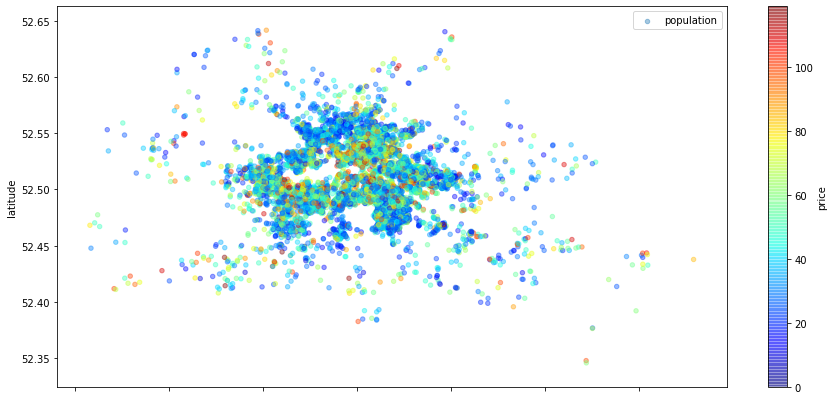

In [5]:
import matplotlib.pyplot as plt
housing = location_price.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            label="population",
            c="price", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

Let's see how this lines up to a map of Berlin.

<img src="./berlin-map.png" width="50%">

Now the graph above we have isn't perfect, but we can see that there tend to be higher clusters around the center of the map.  So it does seem that mapping the longitude and latitude does help us predict the price.

Now one thing we can do is try to place this data into clusters, to better label our data.

### Using Kmeans Clustering

Let's start by using kmeans clustering in sklearn, and then we'll unpack how it works.  To use kmeans clustering, we'll first identify the features that we want to cluster our data by. 

In [6]:
X_geo = df_X_train.loc[:, ['longitude', 'latitude']]

And then we'll fit the model to our data, specifying the number of clusters that we want to group our data by.

In [7]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=9,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

The model returns to us a cluster label for each of our observations.  

In [8]:
cluster_labels = kmean.labels_

cluster_labels[:3]

array([6, 3, 3], dtype=int32)

We can get a better sense of how this works by plotting our labels.

In [74]:
df_X_train['geo_labels'] = cluster_labels

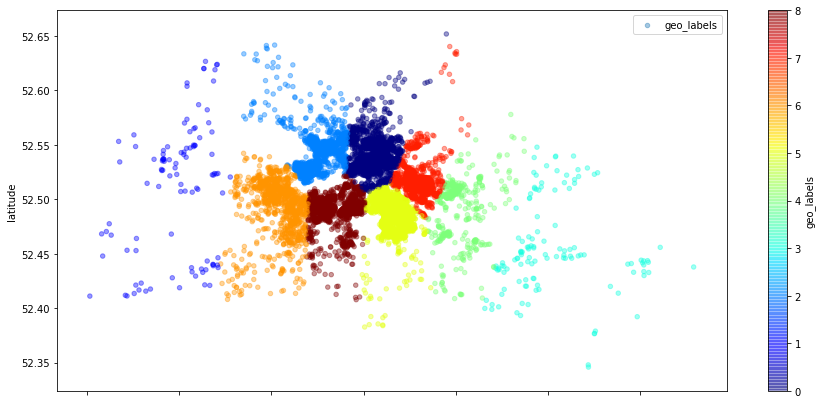

In [75]:
import matplotlib.pyplot as plt

df_X_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            label="geo_labels",
            c="geo_labels", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

So, we can see that Kmeans clustering did a good job of segmenting our listings by the neighborhood.  It did so by attaching a labels to the observations based on how close the data is to each other.

### Summary

In this lesson, we saw the usecase for kmeans clustering as well as how to use it in sklearn.  We can use kmeans clustering to attach labels to our data based on how close the features of observations are to one another.  For example, with our airbnb listings data we used it to literally determine closeness as we grouped listings by their longitude and latitude.  

We saw that we can train our kmeans clustering model in sklearn with the following code:

```python
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)
```

And then, we can retreive the label for each observation with the `labels_` function.

```python
kmean.labels_
```